In [1]:
import itertools as it
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from numpy import linalg as LA
#МПИ
def SimpleIteration(R, x, F):#R - матрица, x - столбец, F - правая часть (столбец)
    T = R@x + F
    return (T)
#МПИ k раз
def SimpleIterations(R,x,F,k):#R - матрица, x - столбец с которого итерируемся, F - правая часть(столбец), k- число итераций
    for i in range(k):
        x = SimpleIteration(R, x, F)
    return x
#k итераций методом Гаусса - Якоби 
def GaussJacobyIterations(A, x, F, k):#A - матрица, x - столбец с которого итерируемся, F - правая часть, k- число итераций
            D = np.diag(A)
            Q = np.identity(len(A))
            G = np.identity(len(A))
            for i in range(len(A)):
                Q[i][i] = 1/D[i]
                G[i][i] = D[i]
            R = -Q@(A - G)
            f = Q@F
            print(R, f, x)
            return SimpleIterations(R, x, f, k)
#Скалярное произведение
def scal(u, v):#u, v - сомножители (столбцы)
    return u@np.transpose(v)
#Итерационный метод вычисления максимального собственного вектора
def MaxEigenIterations(A, x, k):#A - матрица, x - вектор с которого итерируемся, k -число итераций
    u = SimpleIterations(A, x, 0, k-1)
    return scal(SimpleIteration(A,u,0), u)/scal(u, u)

In [119]:
def AbsMax(A):
    return np.max(np.array([np.max(A), -np.min(A)]))

In [109]:
A = np.array([[2, 1], [1, 2]])
E = np.identity(2)
x = np.array([0, 0])
F = np.array([1, -1])
GaussJacobyIterations(A ,x, F, 200)

[[ 0.  -0.5]
 [-0.5  0. ]] [ 0.5 -0.5] [0 0]


array([ 1., -1.])

In [40]:
def IntVect(v, maxnum):
    answ = 0
    norm = np.linalg.norm(v)
    for k in range(1, maxnum):
        q = k*v
        approx = np.array([0 for i in range(len(v))])
        for i in range(len(v)):
            if (q[i] - int(q[i])) < (int(q[i]) + 1 - q[i]):
                approx[i] = int(q[i])
            else:
                approx[i] = int(q[i]) + 1
        if k == 1:
            norm = np.linalg.norm(q - approx, 2)
        else:
            if np.linalg.norm(q - approx) < norm:
                answ = approx
                norm = np.linalg.norm(q -approx)
    return (answ, q)


In [120]:
def SpecRad (A):
        return AbsMax(np.linalg.eig(A)[0])

In [145]:
A = np.array([[2, 1],[1, 2]])
OptRel(A)

[[ 0.  -0.5]
 [-0.5  0. ]]
0.5000000000000001
1.0717967697244908


0

In [144]:
def OptRel(A):
    D = np.diag(A)
    Q = np.identity(len(A))
    G = np.identity(len(A))
    for i in range(len(A)):
        Q[i][i] = 1/D[i]
        G[i][i] = D[i]
    R = -Q@(A - G)
    return (2/(1 + (1 - (SpecRad(R))**2)**0.5)
    


3

In [18]:
A = np.array([[2, 1], [1, 2]], float)
f = np.array([1, 0], float)
x = np.array([0, 0], float)
GaussJacobyIterations(A, x, f, 100)

array([ 0.66666667, -0.33333333])

$u^{(s+1)} = u^{(s)} + \tau (f - Au^{(s)})$

Метод вращений.

$T^TAT = \Lambda$

$\tan (2\alpha) = \frac{2a_{ij}}{a_{ii} - a_{jj}}$

МНК:

$\Phi(\vec{u}) = \Sigma_i (\Sigma_j a_{ij}u_j - f_i)^2 \rightarrow min$

$A_{nxm}\vec{u}_n = \vec{f}_m$

$(A*A)_{nxn}\vec{u} = (A*f)_n$

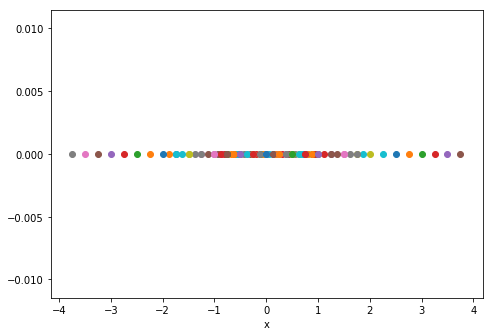

In [50]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.xlabel('x')
for k in (-1, 1):
    for i in (-4, -3, -2):
        for j in range(16):
            plt.scatter(k*j*2**(i) ,0)